In [29]:
import pandas as pd
import glob
import yfinance as yf
import matplotlib.pyplot as plt
ruta = "Datos\DowJones\*.csv"
archivos = glob.glob(ruta)
df = pd.concat((pd.read_csv(archivo) for archivo in archivos), ignore_index=True)
print(df.shape)  
print(df.head())
df.to_csv("Datos/Transformados/csv_unificado.csv", index=False)

<>:5: SyntaxWarning: invalid escape sequence '\D'
<>:5: SyntaxWarning: invalid escape sequence '\D'
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\2483942643.py:5: SyntaxWarning: invalid escape sequence '\D'
  ruta = "Datos\DowJones\*.csv"


(2744418, 9)
      open    high      low  last    close  volume                      date  \
0  213.370  213.41  213.300   NaN  213.300     NaN  2018-08-16T21:30:00+0000   
1  213.280  213.41  213.160   NaN  213.300     NaN  2018-08-16T21:00:00+0000   
2  213.430  213.43  212.985   NaN  213.280     NaN  2018-08-16T20:30:00+0000   
3  213.133  213.73  212.985   NaN  213.480     NaN  2018-08-16T20:00:00+0000   
4  213.273  213.30  213.133   NaN  213.133     NaN  2018-08-16T19:30:00+0000   

  symbol exchange  
0   AAPL     IEXG  
1   AAPL     IEXG  
2   AAPL     IEXG  
3   AAPL     IEXG  
4   AAPL     IEXG  


In [30]:
datos=pd.read_csv('Datos/Transformados/csv_unificado.csv')
datos.head()

,open,high,low,last,close,volume,date,symbol,exchange
0,213.370,213.41,213.300,NaN,213.300,NaN,2018-08-16T21:30:00+0000,AAPL,IEXG
1,213.280,213.41,213.160,NaN,213.300,NaN,2018-08-16T21:00:00+0000,AAPL,IEXG
2,213.430,213.43,212.985,NaN,213.280,NaN,2018-08-16T20:30:00+0000,AAPL,IEXG
3,213.133,213.73,212.985,NaN,213.480,NaN,2018-08-16T20:00:00+0000,AAPL,IEXG
4,213.273,213.30,213.133,NaN,213.133,NaN,2018-08-16T19:30:00+0000,AAPL,IEXG


In [31]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2744418 entries, 0 to 2744417
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   open      float64
 1   high      float64
 2   low       float64
 3   last      float64
 4   close     float64
 5   volume    float64
 6   date      object 
 7   symbol    object 
 8   exchange  object 
dtypes: float64(6), object(3)
memory usage: 188.4+ MB


In [32]:
datos.describe

<bound method NDFrame.describe of             open    high      low     last    close    volume  \
0        213.370  213.41  213.300      NaN  213.300       NaN   
1        213.280  213.41  213.160      NaN  213.300       NaN   
2        213.430  213.43  212.985      NaN  213.280       NaN   
3        213.133  213.73  212.985      NaN  213.480       NaN   
4        213.273  213.30  213.133      NaN  213.133       NaN   
...          ...     ...      ...      ...      ...       ...   
2744413  234.500  235.60  234.170  235.300  234.090  291094.0   
2744414  234.500  235.60  234.170  235.235  234.090  290571.0   
2744415  234.500  235.60  234.170  235.270  234.090  290254.0   
2744416  234.500  235.60  234.170  235.255  234.090  289854.0   
2744417  234.500  235.60  234.170  235.285  234.090  289454.0   

                             date symbol exchange  
0        2018-08-16T21:30:00+0000   AAPL     IEXG  
1        2018-08-16T21:00:00+0000   AAPL     IEXG  
2        2018-08-16T20:30:00+

In [33]:
import datetime as dt
datos['date'] = pd.to_datetime(datos['date'])

In [34]:
datos.isna().sum()

open             0
high             0
low              0
last        849956
close       611651
volume      847408
date             0
symbol           0
exchange         0
dtype: int64

In [35]:
datos.duplicated().sum()

np.int64(0)

In [36]:
datos.groupby('symbol').apply(lambda x: x.count())

C:\Users\lande\AppData\Local\Temp\ipykernel_45640\4000902064.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  datos.groupby('symbol').apply(lambda x: x.count())


,open,high,low,last,close,volume,date,symbol,exchange
symbol,,,,,,,,,
AAPL,48723,48723,48723,19353,42034,19359,48723,48723,48723
AMGN,25296,25296,25296,17980,18498,18002,25296,25296,25296
AXP,95650,95650,95650,69450,70352,69550,95650,95650,95650
BA,101436,101436,101436,75507,76442,75639,101436,101436,101436
CAT,122364,122364,122364,74653,97227,74787,122364,122364,122364
CRM,108823,108823,108823,79587,83805,79712,108823,108823,108823
CSCO,108585,108585,108585,79333,83470,79372,108585,108585,108585
CVX,108876,108876,108876,79748,83873,79812,108876,108876,108876
DIS,109393,109393,109393,80333,84498,80452,109393,109393,109393


In [37]:
datos.isna().sum()

open             0
high             0
low              0
last        849956
close       611651
volume      847408
date             0
symbol           0
exchange         0
dtype: int64

In [38]:
datos['fecha'] = datos['date'].dt.date 
df_primeros = datos.groupby(['fecha', 'symbol']).first().reset_index()
df_primeros

,fecha,symbol,open,high,low,last,close,volume,date,exchange
0,2018-06-06,AAPL,193.385,194.000,193.280,NaN,194.000,NaN,2018-06-06 23:30:00+00:00,IEXG
1,2018-06-07,AAPL,193.680,193.910,193.225,NaN,193.500,NaN,2018-06-07 23:30:00+00:00,IEXG
2,2018-06-07,INTC,55.940,56.000,55.835,NaN,55.900,NaN,2018-06-07 23:30:00+00:00,IEXG
3,2018-06-08,AAPL,191.555,191.995,191.475,NaN,191.510,NaN,2018-06-08 23:30:00+00:00,IEXG
4,2018-06-08,INTC,55.095,55.260,54.930,NaN,55.005,NaN,2018-06-08 23:30:00+00:00,IEXG
...,...,...,...,...,...,...,...,...,...,...
12296,2021-07-01,NKE,154.560,154.560,154.560,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12297,2021-07-01,PG,135.050,135.050,135.050,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12298,2021-07-01,TRV,149.830,149.830,149.830,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG
12299,2021-07-01,UNH,400.410,400.410,400.410,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG


In [39]:
df_primeros.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        4384
close        555
volume      4384
date           0
exchange       0
dtype: int64

In [40]:
df_primeros['fecha']=pd.to_datetime(df_primeros['fecha'])
df_primeros['dia_semana'] = df_primeros['fecha'].dt.day_of_week
df_primeros['close'] = df_primeros.apply(lambda row: row['last'] if pd.isna(row['close']) else row['close'], axis=1)
df_primeros

,fecha,symbol,open,high,low,last,close,volume,date,exchange,dia_semana
0,2018-06-06,AAPL,193.385,194.000,193.280,NaN,194.000,NaN,2018-06-06 23:30:00+00:00,IEXG,2
1,2018-06-07,AAPL,193.680,193.910,193.225,NaN,193.500,NaN,2018-06-07 23:30:00+00:00,IEXG,3
2,2018-06-07,INTC,55.940,56.000,55.835,NaN,55.900,NaN,2018-06-07 23:30:00+00:00,IEXG,3
3,2018-06-08,AAPL,191.555,191.995,191.475,NaN,191.510,NaN,2018-06-08 23:30:00+00:00,IEXG,4
4,2018-06-08,INTC,55.095,55.260,54.930,NaN,55.005,NaN,2018-06-08 23:30:00+00:00,IEXG,4
...,...,...,...,...,...,...,...,...,...,...,...
12296,2021-07-01,NKE,154.560,154.560,154.560,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12297,2021-07-01,PG,135.050,135.050,135.050,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12298,2021-07-01,TRV,149.830,149.830,149.830,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3
12299,2021-07-01,UNH,400.410,400.410,400.410,NaN,NaN,NaN,2021-07-01 00:00:00+00:00,IEXG,3


In [41]:
dias_laborales = df_primeros[df_primeros['dia_semana'] != 6].copy()
print("Missings en close ANTES de imputar:", dias_laborales['close'].isna().sum())
sabados_2am = dias_laborales[
    (dias_laborales['dia_semana'] == 5) &
    (pd.to_datetime(dias_laborales['date']).dt.hour == 2)
][['symbol', 'fecha', 'last']].copy()

sabados_2am['fecha'] = pd.to_datetime(sabados_2am['fecha']) - pd.Timedelta(days=1)
mask_viernes = (dias_laborales['dia_semana'] == 4) & (dias_laborales['close'].isna())
dias_laborales['fecha'] = pd.to_datetime(dias_laborales['fecha'])
imputaciones = dias_laborales[mask_viernes].merge(
    sabados_2am,
    on=['symbol', 'fecha'],
    how='left')
dias_laborales.loc[mask_viernes, 'close'] = imputaciones['last_y'].values
dias_laborales = dias_laborales[dias_laborales['dia_semana'] != 5].copy()
dias_laborales = dias_laborales.drop(columns=['dia_semana'])
print("Missings en close DESPUÉS de imputar:", dias_laborales['close'].isna().sum())

Missings en close ANTES de imputar: 553
Missings en close DESPUÉS de imputar: 153


In [42]:
dias_laborales['close'] = dias_laborales['close'].fillna(dias_laborales['last'])
print("Missings en close DESPUÉS de imputar con last:", dias_laborales['close'].isna().sum())

Missings en close DESPUÉS de imputar con last: 153


In [43]:
faltantes = dias_laborales[dias_laborales["close"].isna()].copy()
data_cache = {}
for symbol in faltantes["symbol"].unique():
    fechas = faltantes.loc[faltantes["symbol"] == symbol, "fecha"].dt.strftime("%Y-%m-%d").tolist()
    start, end = min(fechas), max(fechas)
    if symbol not in data_cache:
        try:
            hist = yf.download(symbol, start=start, end=end)
            hist.index = hist.index.tz_localize(None)  
            data_cache[symbol] = hist
        except Exception as e:
            print(f"Error descargando {symbol}: {e}")
            continue
    for f in fechas:
        try:
            valor = data_cache[symbol].loc[f, "Close"]
            dias_laborales.loc[(dias_laborales["symbol"] == symbol) & (dias_laborales["fecha"] == pd.to_datetime(f)), "close"] = valor
        except KeyError:
            pass

C:\Users\lande\AppData\Local\Temp\ipykernel_45640\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[*********************100%***********************]  1 of 1 completed
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\1649190155.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  hist = yf.download(symbol, start=start, end=end)
[********

In [44]:
dias_laborales.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        3351
close        153
volume      3351
date           0
exchange       0
dtype: int64

In [45]:
missing_rows = dias_laborales[dias_laborales['close'].isna()].copy()
print("Missings en close antes de Yahoo Finance:", len(missing_rows))
for idx, row in missing_rows.iterrows():
    symbol = row['symbol']
    fecha = pd.to_datetime(row['fecha'])
    try:
        df_yf = yf.download(
            symbol,
            start=fecha,
            end=fecha + pd.Timedelta(days=1),
            interval="1d",
            progress=False)
        if not df_yf.empty:
            close_val = df_yf['Close'].iloc[0] 
            dias_laborales.at[idx, 'close'] = close_val
            dias_laborales.at[idx, 'last'] = close_val
    except Exception as e:
        print(f"Error con {symbol} en {fecha.date()}: {e}")
print("Missings en close después de Yahoo Finance:", dias_laborales['close'].isna().sum())

C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(


Missings en close antes de Yahoo Finance: 153


C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dias_laborales.at[idx, 'close'] = close_val
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dias_laborales.at[idx, 'last'] = close_val
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_yf = yf.download(
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dias_laborales.at[idx, 'close'] = close_val
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:16:

Missings en close después de Yahoo Finance: 23


C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:15: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dias_laborales.at[idx, 'close'] = close_val
C:\Users\lande\AppData\Local\Temp\ipykernel_45640\502457495.py:16: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  dias_laborales.at[idx, 'last'] = close_val


In [46]:
dias_laborales.isna().sum()

fecha          0
symbol         0
open           0
high           0
low            0
last        3221
close         23
volume      3351
date           0
exchange       0
dtype: int64

In [47]:
df_p = dias_laborales[['fecha','symbol','close']].copy()
df_p = df_p[df_p['fecha'] != '2021-04-02'].copy()
df_p.to_csv('Datos/Transformados/close.csv', index=False)

In [48]:
df_raw = pd.read_csv('Datos/Transformados/close_limpio.csv')
symbols = df_raw['symbol'].unique()
dfs = {}
for symbol in symbols:
    df_symbol = df_raw[df_raw['symbol'] == symbol].copy()
    df_symbol = df_symbol.sort_values('fecha')
    df_symbol = df_symbol.set_index('fecha')
    dfs[symbol] = df_symbol[['close']].rename(columns={'close': 'Close'})

In [49]:
df_raw['fecha'] = pd.to_datetime(df_raw['fecha']).dt.date
df = df_raw.pivot(index='fecha', columns='symbol', values='close')
df.head()

symbol,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,194.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-07,193.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-08,191.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-11,191.16,NaN,NaN,NaN,156.350,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,133.88
2018-06-12,192.32,NaN,NaN,NaN,157.485,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,74.3,NaN,NaN,NaN,134.88


In [ ]:
df.index = pd.to_datetime(df.index)
tickers = df.columns.tolist()
start = df.index.min()
end   = df.index.max()
data = yf.download(
    tickers,
    start=start,
    end=end,
    auto_adjust=False,
    group_by='ticker')
if isinstance(data.columns, pd.MultiIndex):
    data_close = data.xs('Close', level=1, axis=1)
else:
    data_close = data[['Close']]
data_close = data_close.reindex(df.index)
df_imputado = df.combine_first(data_close)

[*********************100%***********************]  25 of 26 completed

1 Failed download:
['INTC']: Timeout('Failed to perform, curl: (28) Operation timed out after 10009 milliseconds with 0 bytes received. See https://curl.se/libcurl/c/libcurl-errors.html first for more details.')


[*********************100%***********************]  25 of 26 completed

In [51]:
df_imputado

,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,194.000000,183.550003,100.970001,371.559998,156.509995,135.550003,44.259998,123.379997,101.910004,NaN,...,43.459999,162.380005,170.451508,59.093510,102.489998,74.750000,74.349998,128.770004,248.649994,136.279999
2018-06-07,193.500000,183.300003,101.480003,368.529999,156.289993,132.910004,43.650002,126.959999,102.470001,NaN,...,43.439999,169.479996,171.463211,59.150764,100.879997,74.760002,75.760002,129.770004,248.979996,133.839996
2018-06-08,191.510000,184.300003,101.000000,369.500000,155.320007,133.529999,43.480000,126.440002,103.980003,NaN,...,43.950001,168.910004,172.734116,59.713741,101.629997,74.900002,77.180000,131.320007,250.679993,134.740005
2018-06-11,191.160000,184.610001,101.199997,370.940002,156.350000,133.979996,43.689999,127.559998,104.349998,NaN,...,44.130001,166.490005,171.505020,59.475189,101.050003,74.589996,77.529999,130.500000,253.779999,133.880000
2018-06-12,192.320000,185.070007,100.730003,370.619995,157.485000,136.259995,43.939999,127.080002,104.330002,NaN,...,44.410000,166.729996,171.337799,59.580154,101.309998,74.300000,77.239998,129.580002,253.580002,134.880000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-25,133.410000,240.950000,168.210000,250.570000,219.340000,243.770000,52.780000,107.140000,177.930000,63.110000,...,54.390000,233.330000,193.260000,76.360000,266.690000,133.600000,133.020000,149.970000,398.870000,236.240000
2021-06-28,133.110000,242.680000,169.450000,248.380000,216.310000,241.870000,53.060000,107.300000,178.350000,63.290000,...,54.320000,232.420000,194.750000,77.200000,265.020000,154.350000,134.920000,151.720000,404.950000,237.320000
2021-06-29,134.780000,242.840000,164.780000,239.960000,216.270000,244.570000,52.960000,103.990000,176.570000,62.900000,...,54.260000,231.090000,196.500000,76.860000,268.720000,152.360000,135.320000,149.450000,401.460000,234.090000


In [52]:
fecha_inicio = pd.to_datetime(df_imputado.index.min())
fecha_fin = pd.to_datetime(df_imputado.index.max())
splits_dict = {}
for symbol in df_imputado.columns:
    ticker = yf.Ticker(symbol)
    splits = ticker.splits
    if not splits.empty and not isinstance(splits.index, pd.DatetimeIndex):
        splits.index = pd.to_datetime(splits.index)
    if not splits.empty and splits.index.tz is not None:
        splits.index = splits.index.tz_convert(None)
    splits_filtrados = splits[(splits.index >= fecha_inicio) & (splits.index <= fecha_fin)] if not splits.empty else splits
    if not splits_filtrados.empty:
        splits_dict[symbol] = splits_filtrados
if splits_dict:
    print("Activos con splits detectados en el rango de fechas de tus datos:")
    for symbol, splits in splits_dict.items():
        print(f"{symbol}:\n{splits}")
else:
    print("Ningún activo ha tenido splits en el rango de fechas de tus datos.")
df_ajustado = df_imputado.copy()
for symbol in splits_dict.keys():
    splits = splits_dict[symbol]
    for fecha_split, factor in splits.items():
        if isinstance(fecha_split, pd.Timestamp):
            fecha_split_ts = fecha_split
        else:
            fecha_split_ts = pd.Timestamp(fecha_split)
        idx_ts = pd.to_datetime(df_ajustado.index)
        mask = idx_ts < fecha_split_ts
        df_ajustado.loc[mask, symbol] = df_ajustado.loc[mask, symbol] / factor
df_ajustado.head()

Activos con splits detectados en el rango de fechas de tus datos:
AAPL:
Date
2020-08-31 04:00:00    4.0
Name: Stock Splits, dtype: float64
MRK:
Date
2021-06-03 04:00:00    1.048
Name: Stock Splits, dtype: float64


,AAPL,AMGN,AXP,BA,CAT,CRM,CSCO,CVX,DIS,DOW,...,KO,MCD,MMM,MRK,MSFT,NKE,PG,TRV,UNH,V
fecha,,,,,,,,,,,,,,,,,,,,,
2018-06-06,48.5000,183.550003,100.970001,371.559998,156.509995,135.550003,44.259998,123.379997,101.910004,NaN,...,43.459999,162.380005,170.451508,56.386937,102.489998,74.750000,74.349998,128.770004,248.649994,136.279999
2018-06-07,48.3750,183.300003,101.480003,368.529999,156.289993,132.910004,43.650002,126.959999,102.470001,NaN,...,43.439999,169.479996,171.463211,56.441569,100.879997,74.760002,75.760002,129.770004,248.979996,133.839996
2018-06-08,47.8775,184.300003,101.000000,369.500000,155.320007,133.529999,43.480000,126.440002,103.980003,NaN,...,43.950001,168.910004,172.734116,56.978761,101.629997,74.900002,77.180000,131.320007,250.679993,134.740005
2018-06-11,47.7900,184.610001,101.199997,370.940002,156.350000,133.979996,43.689999,127.559998,104.349998,NaN,...,44.130001,166.490005,171.505020,56.751135,101.050003,74.589996,77.529999,130.500000,253.779999,133.880000
2018-06-12,48.0800,185.070007,100.730003,370.619995,157.485000,136.259995,43.939999,127.080002,104.330002,NaN,...,44.410000,166.729996,171.337799,56.851292,101.309998,74.300000,77.239998,129.580002,253.580002,134.880000


In [53]:
df_ajustado_interpolado = df_ajustado.interpolate(method='time', limit_direction='forward', axis=0)
print("Missings tras interpolar:", df_ajustado_interpolado.isna().sum())

Missings tras interpolar: AAPL      0
AMGN      0
AXP       0
BA        0
CAT       0
CRM       0
CSCO      0
CVX       0
DIS       0
DOW     205
GS        0
HD        0
IBM       0
INTC      1
JNJ       0
JPM       0
KO        0
MCD       0
MMM       0
MRK       0
MSFT      0
NKE       0
PG        0
TRV       0
UNH       0
V         0
dtype: int64


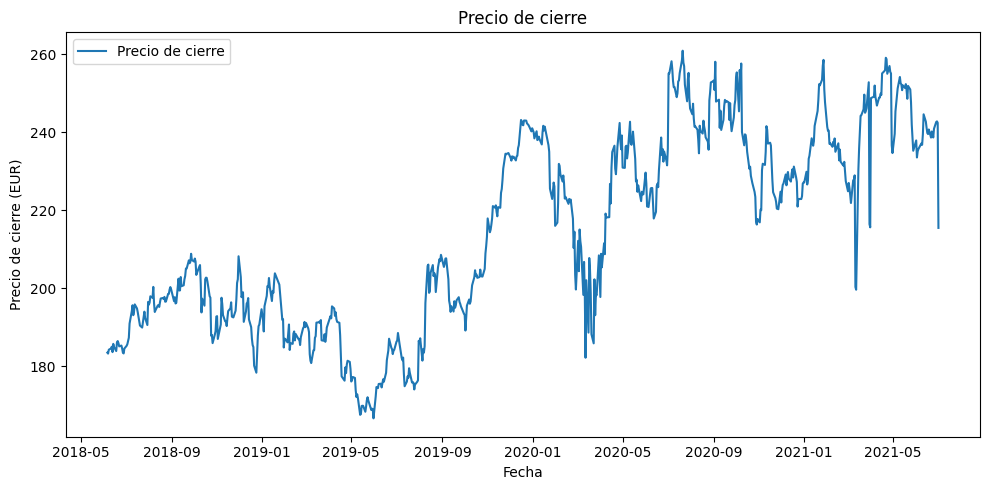

In [54]:
plt.figure(figsize=(10,5))
plt.plot(df_ajustado_interpolado.index, df_ajustado_interpolado['AMGN'], label='Precio de cierre')
plt.title(f'Precio de cierre')
plt.xlabel('Fecha')
plt.ylabel('Precio de cierre (EUR)')
plt.legend()
plt.tight_layout()
plt.show()

In [55]:
primer_na = df_ajustado_interpolado['DOW'].isna().idxmax()
if pd.isna(df_ajustado_interpolado.loc[primer_na, 'DOW']):
    df_ajustado_sinan = df_ajustado_interpolado.loc[primer_na:].iloc[1:]

In [56]:
df_ajustado_sinan.to_csv('Datos/Transformados/limpio.csv', index=False)